<a href="https://colab.research.google.com/github/tsourolampis/bu-cs630-fall23/blob/main/Greedy_algorithm_for_vertex_coloring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
graph = {
 'A': ['B', 'C', 'E'],
 'B': ['A', 'C'],
 'C': ['A', 'B', 'D'],
 'D': ['C'],
 'E': ['A'],
 'F': ['G'],
 'G': ['F']
}



NetworkX is a popular library for graph analysis. We can use it to visualize the graph but we will code our greedy algorithm from scratch.

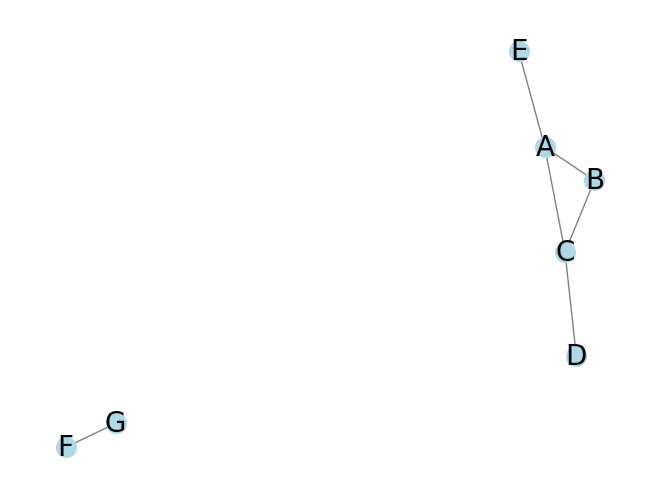

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(graph)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=200, font_size=20)
plt.show()


In [3]:
def color_graph(graph):

    d = max(len(neighbors) for neighbors in graph.values())
    print("Max degree in G =", d)

    # Initialize colors for each node as None
    available_colors = set(range(d + 1)) #wlog of generality, colors are 0..d
    colors = {node: None for node in graph}

    for node in graph:
        if colors[node] is None:
            neighbor_colors = {colors[neighbor] for neighbor in graph[node] if colors[neighbor] is not None}

            available = available_colors - neighbor_colors
            print(" Available colors for node ", node,  " are", available)
            colors[node] = available.pop() #choose an arbitrary one
            print(" Coloring node ", node, " with color ", colors[node])

    return colors

In [4]:
colors_dict = color_graph(graph)

Max degree in G = 3
 Available colors for node  A  are {0, 1, 2, 3}
 Coloring node  A  with color  0
 Available colors for node  B  are {1, 2, 3}
 Coloring node  B  with color  1
 Available colors for node  C  are {2, 3}
 Coloring node  C  with color  2
 Available colors for node  D  are {0, 1, 3}
 Coloring node  D  with color  0
 Available colors for node  E  are {1, 2, 3}
 Coloring node  E  with color  1
 Available colors for node  F  are {0, 1, 2, 3}
 Coloring node  F  with color  0
 Available colors for node  G  are {1, 2, 3}
 Coloring node  G  with color  1


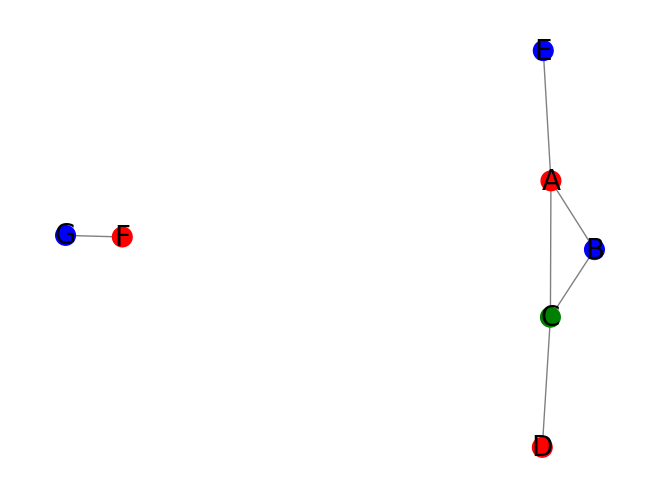

In [5]:
color_map = {0: 'red', 1: 'blue', 2: 'green'}
node_colors = [color_map[colors_dict[node]] for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, edge_color='gray', node_size=200, font_size=20)
plt.show()

